## Problem Set 3 Part 2

### Part A

In [412]:
#Load in needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter, YearLocator, MonthLocator, DayLocator
from sklearn.metrics import mean_squared_error
# Load AutoReg class from statsmodels.tsa.ar_model module
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA


In [567]:
#Load in data frames for each file
path1 = r'C:\Users\kalib\Documents\IDS.131\Pset 3\Part2\PriceStats_CPI.csv'
df_PriceStatCPI = pd.read_csv(path1)




In [568]:
path2 = r'C:\Users\kalib\Documents\IDS.131\Pset 3\Part2\T5YIE.csv'
df_BER5 = pd.read_csv(path2)

path3 = r'C:\Users\kalib\Documents\IDS.131\Pset 3\Part2\T10YIE.csv'
df_BER10 = pd.read_csv(path3)

In [569]:
#Check for NaN values 
df_BER5.replace('.', np.nan, inplace=True)

print(df_BER5.isnull().values.any())


True


In [570]:
df_BER5.fillna(axis=0, inplace=True, method= 'ffill')

In [571]:
#Check for NaN values 
df_BER10.replace('.', np.nan, inplace=True)
df_BER10.head()
df_BER10.fillna(axis=0, inplace=True, method='ffill')
print(df_BER10.isnull().values.any())


False


In [572]:
df_BER5['T5YIE'] = df_BER5['T5YIE'].astype(float)
df_BER10['T10YIE'] = df_BER10['T10YIE'].astype(float)


In [573]:

df_BER5['DATE'] =  pd.to_datetime(df_BER5['DATE'], format = '%Y-%m-%d')
df_BER5 = df_BER5.set_index('DATE')


In [574]:
df_BER10['DATE'] =  pd.to_datetime(df_BER10['DATE'], format = '%Y-%m-%d')
df_BER10 = df_BER10.set_index('DATE')

In [450]:
df_BER5.head()

,T5YIE
DATE,
2003-01-02,1.30
2003-01-03,1.28
2003-01-06,1.31
2003-01-07,1.28
2003-01-08,1.33


In [575]:
#BER Data 
df_BER5month = df_BER5['T5YIE'].resample('MS').first()
df_BER10month = df_BER10['T10YIE'].resample('MS').first()


In [576]:
df_BER5month = df_BER5month.to_frame()
df_BER10month = df_BER10month.to_frame()

In [577]:
df_BER10.fillna(axis=0, inplace=True, method='ffill')
print(df_BER10.isnull().values.any())


df_BER5.fillna(axis=0, inplace=True, method='ffill')
print(df_BER5.isnull().values.any())

False
False


In [578]:
#Calculate Inflation Rate from BER
#Use deannualized formula

df_BER5month['IR5'] = ((1+df_BER5month['T5YIE'])**(1/(12)))-1


In [455]:
df_BER5month.head()

,T5YIE,IR5
DATE,,
2003-01-01,1.398095,0.014685
2003-02-01,1.654211,0.016402
2003-03-01,1.695238,0.016662
2003-04-01,1.568571,0.015847
2003-05-01,1.336667,0.014246


In [579]:

df_BER10month['IR10'] = ((1+df_BER10month['T10YIE'])**(1/12))-1

In [580]:
df_PriceStatCPI['date'] =  pd.to_datetime(df_PriceStatCPI['date'], format = '%Y-%m-%d')
df_PriceStatCPI = df_PriceStatCPI.set_index('date')

df_PriceStatCPI.head()


,PriceStats,CPI
date,,
2008-07-24,100.00000,100.0
2008-07-25,99.99767,100.0
2008-07-26,99.92376,100.0
2008-07-27,99.91537,100.0
2008-07-28,99.89491,100.0


In [581]:
#Check for NaN values 
check_nan = df_PriceStatCPI['CPI'].isnull().values.any()
  
# printing the result
print(check_nan)

True


In [582]:
#Drop all rows that have a NaN value for the CPI data
df_PriceStatCPI.fillna(axis=0, inplace=True, method='ffill')

In [583]:
df_PSmonth = df_PriceStatCPI['PriceStats'].resample('MS').first()
df_CPImonth = df_PriceStatCPI['CPI'].resample('MS').first()

In [584]:
#Drop all rows that have a NaN value for the CPI data
df_PSmonth.fillna(axis=0, inplace=True, method='ffill')
df_CPImonth.fillna(axis=0, inplace=True, method='ffill')
df_BER10month.fillna(axis=0, method='ffill', inplace=True)
df_BER5month.fillna(axis=0, method='ffill', inplace=True)

In [585]:
df_PSmonth = df_PSmonth.to_frame()
df_CPImonth = df_CPImonth.to_frame()

In [437]:
df_PSmonth.head()

,PriceStats
date,
2008-07-01,99.921037
2008-08-01,99.727196
2008-09-01,99.770512
2008-10-01,99.011287
2008-11-01,97.221704


In [586]:
row_num = len(df_CPImonth)
df_CPImonth['CPI rate'] = np.zeros(row_num)

for i in range(1, row_num):
                                      
    CPI =  df_CPImonth.iloc[i,0]
    CPI_minus1 =  df_CPImonth.iloc[(i-1),0]
    rate = ((CPI-CPI_minus1)/CPI_minus1)*100

    df_CPImonth.iloc[i,1] = rate


In [587]:
row_num = len(df_PSmonth)
df_PSmonth['PriceStat_Rate'] = np.zeros(row_num)

for i in range(1, row_num):
                                      
    PS = df_PSmonth.iloc[i,0]
    PS_minus1 = df_PSmonth.iloc[(i-1),0]
    ps_rate = ((PS-PS_minus1)/PS_minus1)*100
    df_PSmonth.iloc[i,1] = ps_rate


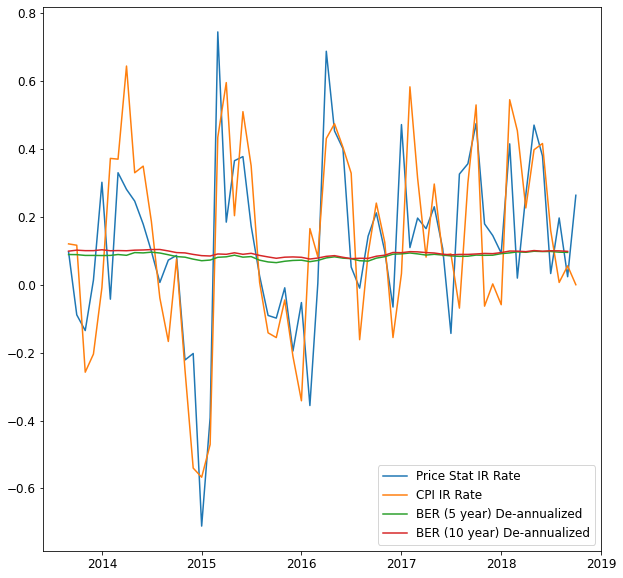

In [588]:
plt.figure(figsize=(10,10))

plt.plot(df_PSmonth['PriceStat_Rate'].loc['2013-09-01':], label='Price Stat IR Rate')
plt.plot(df_CPImonth['CPI rate'].loc['2013-09-01':], label='CPI IR Rate')
plt.plot(df_BER5month['IR5'].loc['2013-09-01':'2018-09-01'], label='BER (5 year) De-annualized')
plt.plot(df_BER10month['IR10'].loc['2013-09-01':'2018-09-01'], label='BER (10 year) De-annualized')

plt.legend()


In [ ]:
df_first = df_PriceStatCPI.resample('MS').first()
df_first.drop(columns=['PriceStats'], inplace=True)
df_first.drop(columns=['CPI'], inplace=True)


In [9]:
result = adfuller(df_PriceStatCPI['CPI rate'], autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')

ADF Statistic: -6.347820606066295
n_lags: 2.6560200532419746e-08
p-value: 2.6560200532419746e-08


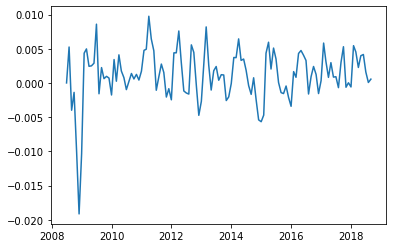

In [14]:

y=df_first['CPI rate']
plt.plot(y)

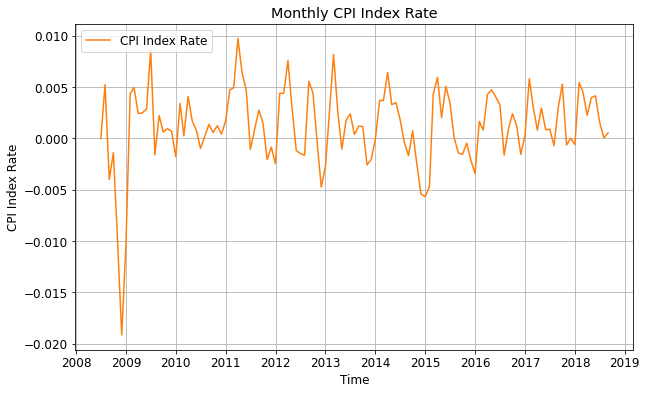

In [15]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(y, color='tab:orange', label='CPI Index Rate')

# Same as above
ax.set_xlabel('Time')
ax.set_ylabel('CPI Index Rate')
ax.set_title('Monthly CPI Index Rate')
ax.grid(True)
ax.legend(loc='upper left');

# Set the x-axis to do major ticks for the year and label them like '07/20'
ax.xaxis.set_major_locator(YearLocator())
ax.xaxis.set_major_formatter(DateFormatter('%Y'))



In [16]:
#To quantitatively check stationarity
df_stationarityTest = adfuller(df_first['CPI rate'], autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])


P-value:  0.011710303355664786


In [463]:
decomposition = seasonal_decompose(df_CPImonth['CPI rate'], period = 12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Text(0.5, 1.0, 'Trend component')

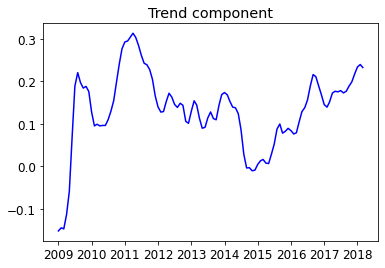

In [464]:
plt.plot(trend, label='Trend',color='blue')
plt.title('Trend component')

Text(0.5, 1.0, 'Seasonal component')

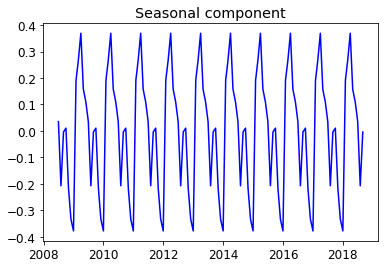

In [465]:
plt.plot(seasonal, label='Seasonal',color='blue')
plt.title('Seasonal component')


Text(0.5, 1.0, 'Residual component')

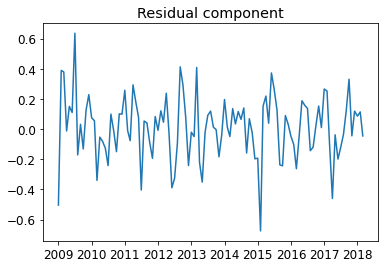

In [466]:
plt.plot(residual)
plt.title('Residual component')

In [468]:
df_first_decomp = residual
df_first_decomp.dropna(inplace=True)

In [469]:
#To quantitatively check stationarity
df_stationarityTest = adfuller(df_first_decomp, autolag='AIC')
#
# Check the value of p-value
#
print("P-value: ", df_stationarityTest[1])

P-value:  2.273580104325492e-05


In [33]:
df_first_decomp.shape

(111,)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

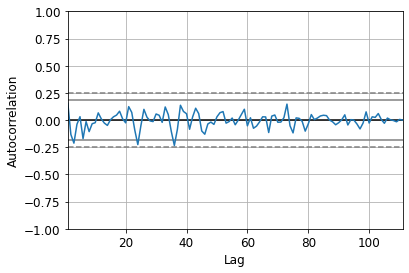

In [29]:
#Plot autocorrelation for all time lags
autocorrelation_plot(df_first_decomp)


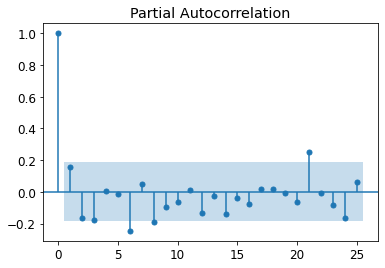

In [34]:
#plot partial autocorrelation plot to assess

pacf = plot_pacf(df_first_decomp, lags=25)

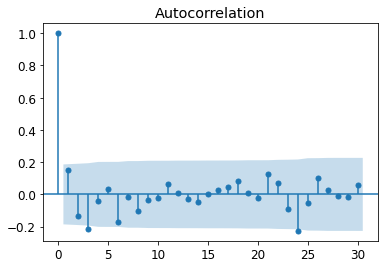

In [32]:
acf = plot_acf(df_first_decomp, lags=30)

In [79]:
df_first['CPI rate'][0:100]

date
2008-07-01    0.000000
2008-08-01    0.005251
2008-09-01   -0.003992
2008-10-01   -0.001382
2008-11-01   -0.010101
                ...   
2016-06-01    0.004046
2016-07-01    0.003285
2016-08-01   -0.001619
2016-09-01    0.000918
2016-10-01    0.002404
Freq: MS, Name: CPI rate, Length: 100, dtype: float64

In [85]:
df_first['CPI rate'][0:100]

date
2008-07-01    0.000000
2008-08-01    0.005251
2008-09-01   -0.003992
2008-10-01   -0.001382
2008-11-01   -0.010101
                ...   
2016-06-01    0.004046
2016-07-01    0.003285
2016-08-01   -0.001619
2016-09-01    0.000918
2016-10-01    0.002404
Freq: MS, Name: CPI rate, Length: 100, dtype: float64

In [41]:
train_data

date
2009-01-01   -0.005039
2009-02-01    0.003887
2009-03-01    0.003784
2009-04-01   -0.000128
2009-05-01    0.001503
                ...   
2016-12-01    0.000096
2017-01-01    0.002655
2017-02-01    0.002520
2017-03-01   -0.001036
2017-04-01   -0.004602
Freq: MS, Name: resid, Length: 100, dtype: float64

In [42]:
test_data

date
2017-05-01   -0.000382
2017-06-01   -0.001989
2017-07-01   -0.001227
2017-08-01   -0.000343
2017-09-01    0.001265
2017-10-01    0.003303
2017-11-01   -0.000451
2017-12-01    0.001190
2018-01-01    0.000856
2018-02-01    0.001136
2018-03-01   -0.000455
Freq: MS, Name: resid, dtype: float64

In [148]:
def AR_fit_seasonal(lagnum, df, trainsize):
    n = len(df)
    train = df[0:trainsize]
    test = df[trainsize:n]
# Instantiate and fit the AR model with training data
    ar_model = AutoReg(train, lags=lagnum, trend = 't', seasonal=True, period = 12).fit()
#
# Print Summary
#
    print(ar_model.summary())
    y_test_pred = (ar_model.predict(start=len(train), end = (n-1), dynamic=False))
    y_train_pred = (ar_model.predict(start=lagnum+1, end=(len(train)-1), dynamic=False))
    y_pred_all = (ar_model.predict(start=lagnum+1, end=(n-1), dynamic=False))
    Test_MSE = mean_squared_error(test, y_test_pred)
    Train_MSE = mean_squared_error(train[(lagnum+1):], y_train_pred)
    print('Testing Data Set MSE', Test_MSE)
    print('Training Data Set MSE', Train_MSE)
    #Plot the data and the fit. 

    plt.figure(figsize=(10,10))

    plt.plot(train[(lagnum+1):], 'r', label='Training Data')
    plt.plot(test, 'g', label='Testing Data')
    plt.plot(y_pred_all, 'k', label='Predicted Test Function')
    plt.ylim([-0.01, 0.01])
    plt.ylabel('CPI Index Rate')
    plt.legend()
    
    # Plot the prediction vs test data
    plt.figure(figsize=(10,10))
    plt.plot(y_test_pred, 'k', label='Predicted Test Function')
    plt.plot(test, 'g', label='Testing Data')
    plt.legend()

    #Residuals of Data set


    y_pred_all = (y_pred_all)[:,np.newaxis]
    y_actual = df[(lagnum+1):]
    Residuals = y_actual - y_pred_all
    print(len(y_actual))
    print(len(y_pred_all))
    plt.figure(figsize=(10,10))

    plt.scatter(y_pred_all, Residuals)
    plt.title('Residual Errors versus predicted y')
    plt.xlabel('Predicted Y')
    plt.ylabel('Residual Errors')
    plt.show()
    return y_actual, y_pred_all

C:\Users\kalib\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(
<ipython-input-148-5dabec013824>:38: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_pred_all = (y_pred_all)[:,np.newaxis]


                            AutoReg Model Results                             
Dep. Variable:               CPI rate   No. Observations:                  100
Model:               Seas. AutoReg(8)   Log Likelihood                 446.128
Method:               Conditional MLE   S.D. of innovations              0.002
Date:                Mon, 01 Nov 2021   AIC                            -12.058
Time:                        14:21:48   BIC                            -11.455
Sample:                    03-01-2009   HQIC                           -11.815
                         - 10-01-2016                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
trend       -1.012e-05   7.73e-06     -1.309      0.191   -2.53e-05    5.04e-06
seasonal.0      0.0008      0.001      0.726      0.468      -0.001       0.003
seasonal.1     -0.0016      0.001     -1.645    

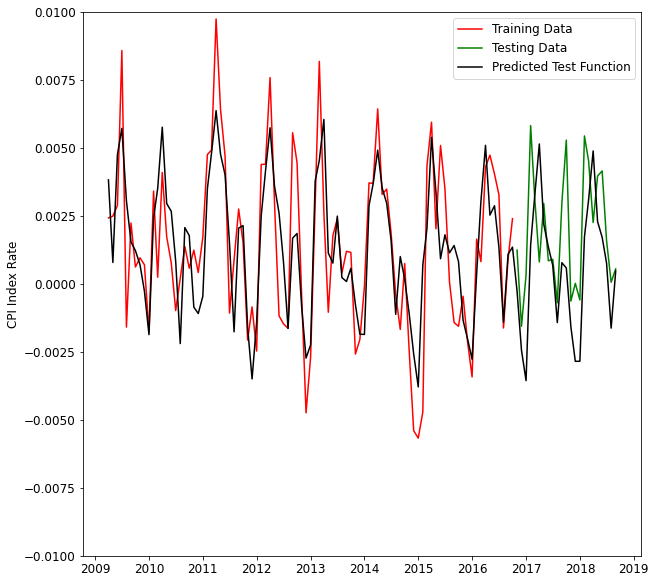

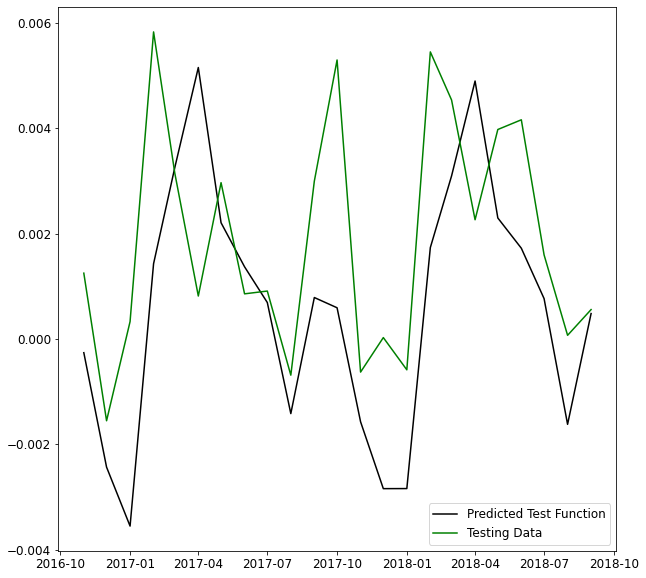

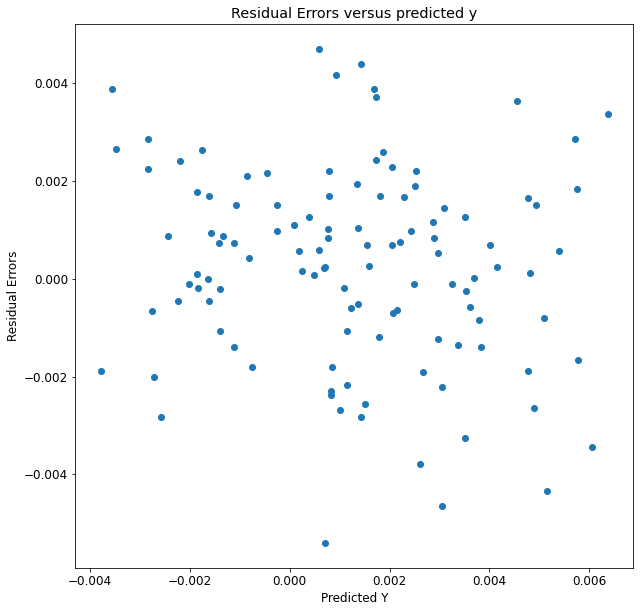

In [149]:
result = AR_fit_seasonal(8, df_first, 100)

In [589]:
a = df_PSmonth['PriceStat_Rate']
b = df_BER5month['IR5'].loc['2008-07-01':'2018-10-01']
BER_PS = pd.concat([a, b], axis=1)


C:\Users\kalib\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                          CPI rate   No. Observations:                  100
Model:             ARIMA(8, 0, 1)x(8, 0, [], 12)   Log Likelihood                   8.576
Date:                           Mon, 01 Nov 2021   AIC                             24.848
Time:                                   22:50:35   BIC                             79.556
Sample:                               07-01-2008   HQIC                            46.989
                                    - 10-01-2016                                         
Covariance Type:                             opg                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1008      0.053     -1.907      0.057      -0.204       0.003
PriceStat_Rate     0.5632      

<ipython-input-596-43cf6f004c4f>:41: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_pred_all = (y_pred_all)[:,np.newaxis]
<ipython-input-596-43cf6f004c4f>:42: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y_actual = df[(lagnum+1):][:,np.newaxis]


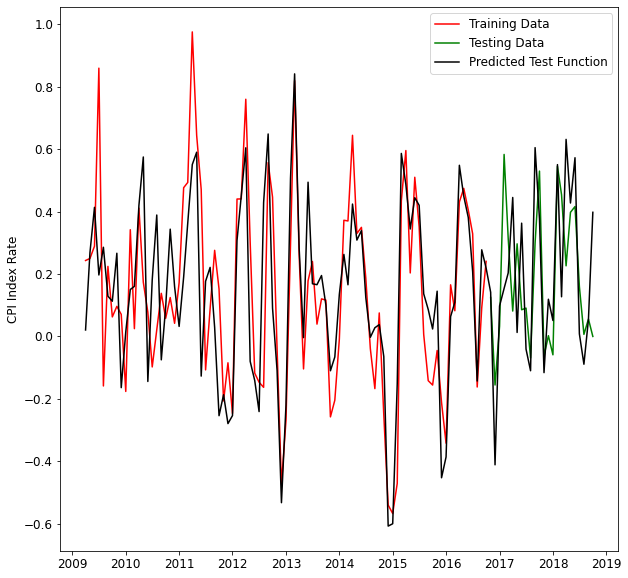

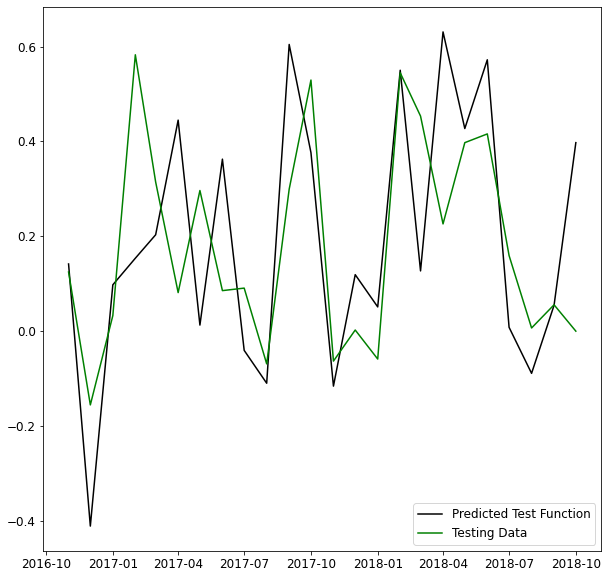

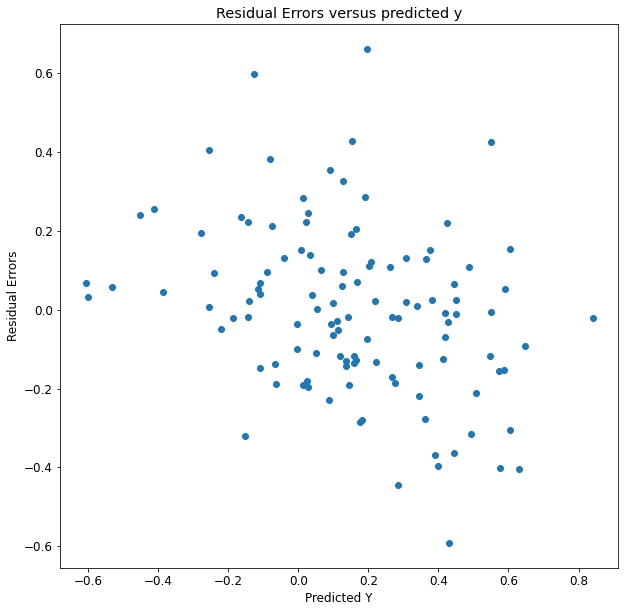

In [597]:
ARIMA_result = ARIMA_fit_seasonal(8, df_CPImonth['CPI rate'],100,BER_PS)

#df_PSmonth['PriceStat_Rate']
#df_BER5month['T5YIE']
#df_BER10month['T10YIE']

In [563]:
ARIMA_result[0].shape


(115,)

In [564]:
ARIMA_result[1].shape


(115, 1)

In [ ]:
seasonal_order = (lagnum, 0, 0, 12)

In [596]:
def ARIMA_fit_seasonal(lagnum, df, trainsize, ex):
    n = len(df)
    train = df[0:trainsize]
    test = df[trainsize:n]
    exog_train = ex[0:trainsize]
    exog_test = ex[trainsize:n]
# Instantiate and fit the AR model with training data
    ar_model = ARIMA(train, order=(lagnum,0,0), exog=exog_train, seasonal_order = (lagnum, 0, 0, 12))
    model_fit = ar_model.fit()
    

# Print Summary
#
    print(model_fit.summary())
    y_test_pred = (model_fit.predict(start=len(train), end = (n-1), dynamic=False, exog =exog_test))
    y_train_pred = (model_fit.predict(start=lagnum+1, end=(len(train)-1), dynamic=False, exog = exog_test))
    y_pred_all = (model_fit.predict(start=lagnum+1, end=(n-1), dynamic=False, exog=exog_test))
    Test_MSE = mean_squared_error(test, y_test_pred)
    Train_MSE = mean_squared_error(train[(lagnum+1):], y_train_pred)
    print('Testing Data Set MSE', Test_MSE)
    print('Training Data Set MSE', Train_MSE)
    #Plot the data and the fit. 

    plt.figure(figsize=(10,10))

    plt.plot(train[(lagnum+1):], 'r', label='Training Data')
    plt.plot(test, 'g', label='Testing Data')
    plt.plot(y_pred_all, 'k', label='Predicted Test Function')
    plt.ylabel('CPI Index Rate')
    plt.legend()
    
    # Plot the prediction vs test data
    plt.figure(figsize=(10,10))
    plt.plot(y_test_pred, 'k', label='Predicted Test Function')
    plt.plot(test, 'g', label='Testing Data')
    plt.legend()

    #Residuals of Data set


    y_pred_all = (y_pred_all)[:,np.newaxis]
    y_actual = df[(lagnum+1):][:,np.newaxis]
    Residuals = y_actual - y_pred_all
    
    plt.figure(figsize=(10,10))

    plt.scatter(y_pred_all, Residuals)
    plt.title('Residual Errors versus predicted y')
    plt.xlabel('Predicted Y')
    plt.ylabel('Residual Errors')
    plt.show()
    return y_actual, y_pred_all

In [79]:
def AR_fit(lagnum, df, trainsize):
    n = len(df)
    train = df[0:trainsize]
    test = df[trainsize:n]
# Instantiate and fit the AR model with training data
    ar_model = AutoReg(train, lags=lagnum).fit()
#
# Print Summary
#
    print(ar_model.summary())
    y_test_pred = (ar_model.predict(start=len(train), end = (len(df)-1), dynamic=False))
    y_train_pred = (ar_model.predict(start=lagnum+1, end=(len(train)-1), dynamic=False))
    y_pred_all = (ar_model.predict(start=lagnum+1, end=(len(df)-1), dynamic=False))
    Test_MSE = mean_squared_error(test, y_test_pred)
    Train_MSE = mean_squared_error(train[(lagnum+1):], y_train_pred)
    print('Testing Data Set MSE', Test_MSE)
    print('Training Data Set MSE', Train_MSE)
    #Plot the data and the fit. 

    plt.figure(figsize=(10,10))

    plt.plot(train[(lagnum+1):], 'r.', label='Training Data')
    plt.plot(test, 'g.', label='Testing Data')
    plt.plot(y_pred_all, label='Predicted Test Function')
    plt.ylim([-0.01, 0.01])
    plt.ylabel('CPI Index Rate')
    plt.legend()